<a href="https://colab.research.google.com/github/omermushtaq007/blog-app/blob/main/learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check which version of tensorflow using

In [3]:
try:
  %tensorflow_version 2.x #This import only works in colab.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


In [5]:
#import data
from sklearn.datasets import load_breast_cancer



In [8]:
data = load_breast_cancer()


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data.data, data.target, test_size=0.33
)

In [13]:
N, D = X_train.shape

In [14]:
N, D

(381, 30)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 28ms/step - loss: 0.7145 - accuracy: 0.6037 - val_loss: 86.0891 - val_accuracy: 0.6117
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6436 - accuracy: 0.6693 - val_loss: 73.6551 - val_accuracy: 0.6117
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5834 - accuracy: 0.7165 - val_loss: 61.7932 - val_accuracy: 0.6117
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5327 - accuracy: 0.7559 - val_loss: 50.6854 - val_accuracy: 0.6117
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4885 - accuracy: 0.7743 - val_loss: 40.2380 - val_accuracy: 0.6117
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4529 - accuracy: 0.7927 - val_loss: 30.2875 - val_accuracy: 0.6117
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4211 - accuracy: 0.8110 - val_loss: 21.1403 - val_accuracy: 0.6064
Epoch

In [21]:
print('Train Score:', model.evaluate(X_train, Y_train))
print('Test Score:', model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9738
Train Score: [0.09250667691230774, 0.9737532734870911]
6/6 [==============================] - 0s 4ms/step - loss: 237.0776 - accuracy: 0.3883
Test Score: [237.07762145996094, 0.3882978856563568]


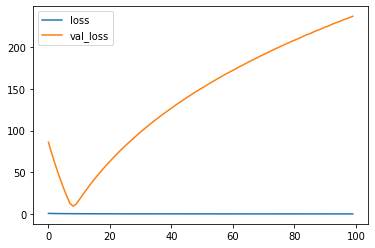

In [23]:
# Show Such results in graph
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
